In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from classification_utils import *
import sklearn
from sklearn import neighbors, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.metrics import RocCurveDisplay

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5148.794751,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.084281,0.365536,0.385427,1.357545,14.574041
std,0.499031,18496.606420,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.109621,0.408358,0.390777,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,53.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.017751,0.136692,0.119116,0.010526,0.104251
50%,1.000000,57.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.045752,0.230747,0.268594,0.043478,0.238606
75%,1.000000,2041.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.088862,0.451218,0.491767,0.949402,24.144412
max,1.000000,399555.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,0.529903,2.183383,1.723913,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

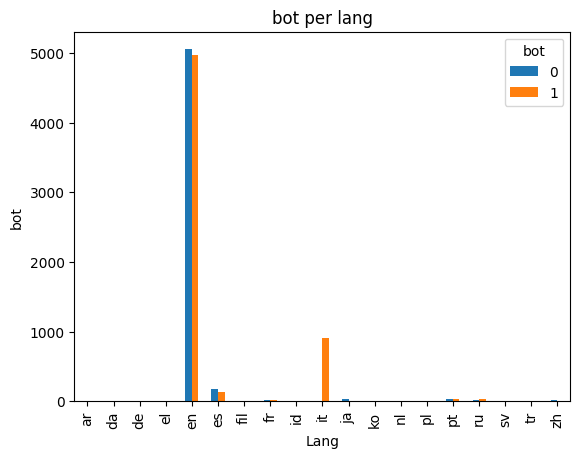

In [6]:
plot_lang_hist(data)

In [7]:
data = data.join(pd.get_dummies(data["lang"]))

In [8]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'ar', 'da', 'de', 'el', 'en', 'es', 'fil', 'fr', 'id', 'it', 'ja', 'ko', 'nl', 'pl', 'pt', 'ru', 'sv', 'tr', 'zh']


In [9]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,...,it,ja,ko,nl,pl,pt,ru,sv,tr,zh
2351467735,1550743978,53,46.951807,9.884337,0.000000,0.387952,0.038554,0.0,0.0,0.043373,...,0,0,0,0,0,0,0,0,0,0
347587058,1470273787,53,78.573190,17.079357,0.005109,0.000000,0.000000,0.0,0.0,0.013137,...,0,0,0,0,0,0,0,0,0,0
1129895606,1517367911,53,55.833333,12.611111,0.000000,0.000000,0.111111,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
269193431,1458547948,9105,60.301689,12.949343,0.051782,0.505816,0.036398,0.0,0.0,0.160600,...,0,0,0,0,0,0,0,0,0,0
2368471386,1551683554,54,63.949580,15.117647,0.000000,0.352941,0.084034,0.0,0.0,0.050420,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_X = sklearn.preprocessing.normalize(train_set.values)
test_X = sklearn.preprocessing.normalize(test_set.values)

In [11]:
k_range = list(range(8, 20))
param_grid = dict(
    n_neighbors = k_range,
    weights = list({'uniform', 'distance'}),
    algorithm = list({'auto', 'ball_tree', 'kd_tree', 'brute'})
)

knn = KNeighborsClassifier()

grid = GridSearchCV(
    knn,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_X, train_label)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3] END algorithm=kd_tree, n_neighbors=8, weights=distance;, score=0.896 total time=   0.1s
[CV 2/3] END algorithm=kd_tree, n_neighbors=8, weights=distance;, score=0.884 total time=   0.0s
[CV 3/3] END algorithm=kd_tree, n_neighbors=8, weights=distance;, score=0.879 total time=   0.0s
[CV 1/3] END algorithm=kd_tree, n_neighbors=8, weights=uniform;, score=0.885 total time=   0.1s
[CV 2/3] END algorithm=kd_tree, n_neighbors=8, weights=uniform;, score=0.879 total time=   0.1s
[CV 3/3] END algorithm=kd_tree, n_neighbors=8, weights=uniform;, score=0.876 total time=   0.1s
[CV 1/3] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.900 total time=   0.1s
[CV 2/3] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.884 total time=   0.0s
[CV 3/3] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.880 total time=   0.0s
[CV 1/3] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, sco

[CV 1/3] END algorithm=brute, n_neighbors=10, weights=uniform;, score=0.886 total time=   0.1s
[CV 2/3] END algorithm=brute, n_neighbors=10, weights=uniform;, score=0.876 total time=   0.1s
[CV 3/3] END algorithm=brute, n_neighbors=10, weights=uniform;, score=0.867 total time=   0.1s
[CV 1/3] END algorithm=brute, n_neighbors=11, weights=distance;, score=0.887 total time=   0.0s
[CV 2/3] END algorithm=brute, n_neighbors=11, weights=distance;, score=0.880 total time=   0.0s
[CV 3/3] END algorithm=brute, n_neighbors=11, weights=distance;, score=0.866 total time=   0.0s
[CV 1/3] END algorithm=brute, n_neighbors=11, weights=uniform;, score=0.888 total time=   0.1s
[CV 2/3] END algorithm=brute, n_neighbors=11, weights=uniform;, score=0.880 total time=   0.1s
[CV 3/3] END algorithm=brute, n_neighbors=11, weights=uniform;, score=0.868 total time=   0.1s
[CV 1/3] END algorithm=brute, n_neighbors=12, weights=distance;, score=0.885 total time=   0.0s
[CV 2/3] END algorithm=brute, n_neighbors=12, 

[CV 1/3] END algorithm=auto, n_neighbors=13, weights=uniform;, score=0.888 total time=   0.1s
[CV 2/3] END algorithm=auto, n_neighbors=13, weights=uniform;, score=0.880 total time=   0.1s
[CV 3/3] END algorithm=auto, n_neighbors=13, weights=uniform;, score=0.869 total time=   0.1s
[CV 1/3] END algorithm=auto, n_neighbors=14, weights=distance;, score=0.886 total time=   0.0s
[CV 2/3] END algorithm=auto, n_neighbors=14, weights=distance;, score=0.881 total time=   0.0s
[CV 3/3] END algorithm=auto, n_neighbors=14, weights=distance;, score=0.870 total time=   0.0s
[CV 1/3] END algorithm=auto, n_neighbors=14, weights=uniform;, score=0.886 total time=   0.1s
[CV 2/3] END algorithm=auto, n_neighbors=14, weights=uniform;, score=0.880 total time=   0.1s
[CV 3/3] END algorithm=auto, n_neighbors=14, weights=uniform;, score=0.870 total time=   0.1s
[CV 1/3] END algorithm=auto, n_neighbors=15, weights=distance;, score=0.886 total time=   0.0s
[CV 2/3] END algorithm=auto, n_neighbors=15, weights=dis

[CV 3/3] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.885 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.900 total time=   0.1s
[CV 2/3] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.888 total time=   0.1s
[CV 3/3] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.886 total time=   0.1s
[CV 1/3] END algorithm=ball_tree, n_neighbors=16, weights=uniform;, score=0.898 total time=   0.2s
[CV 2/3] END algorithm=ball_tree, n_neighbors=16, weights=uniform;, score=0.885 total time=   0.2s
[CV 3/3] END algorithm=ball_tree, n_neighbors=16, weights=uniform;, score=0.883 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, n_neighbors=17, weights=distance;, score=0.898 total time=   0.1s
[CV 2/3] END algorithm=ball_tree, n_neighbors=17, weights=distance;, score=0.888 total time=   0.1s
[CV 3/3] END algorithm=ball_tree, n_neighbors=17, weights=distance;, score=0.884 total time=   0.1s
[CV 

In [12]:
knn = grid.best_estimator_

In [13]:
train_pred = knn.predict(train_X)
test_pred = knn.predict(test_X)

In [14]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  1.0
Accuracy test set  0.8844483058210252
Precision train set  1.0
Recall train set  1.0
F1 score train set  1.0
Support train set  (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([3774, 4281]))


In [15]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.97      0.78      0.86      1618
         >50       0.83      0.98      0.90      1835

    accuracy                           0.88      3453
   macro avg       0.90      0.88      0.88      3453
weighted avg       0.90      0.88      0.88      3453



In [16]:
# cross validation
scores = cross_validate(knn, train_X, train_label, cv = 3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.00737460454305013
Score time  0.05541070302327474
Test score  0.8911235257603972
Train score  1.0


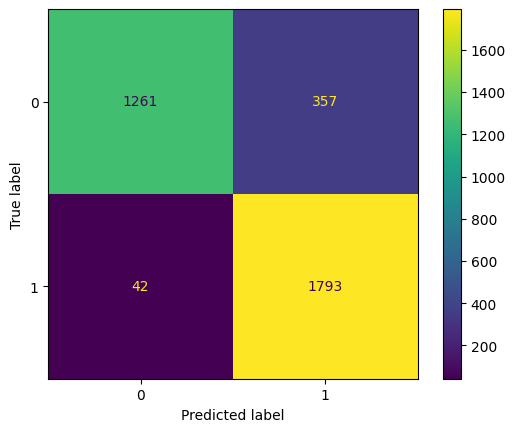

In [17]:
predictions = knn.predict(test_X)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

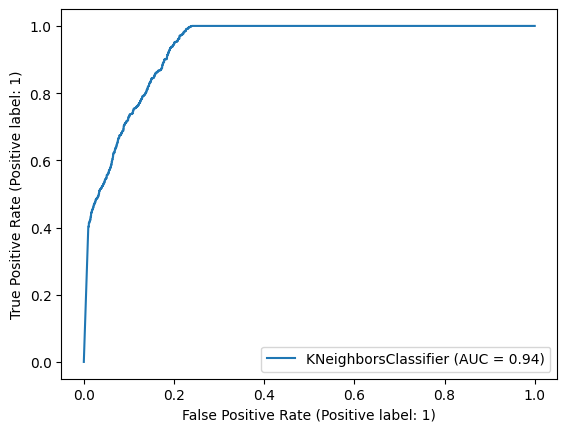

In [18]:
svc_disp = RocCurveDisplay.from_estimator(knn, test_X, test_label)
plt.show()

In [19]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_X)

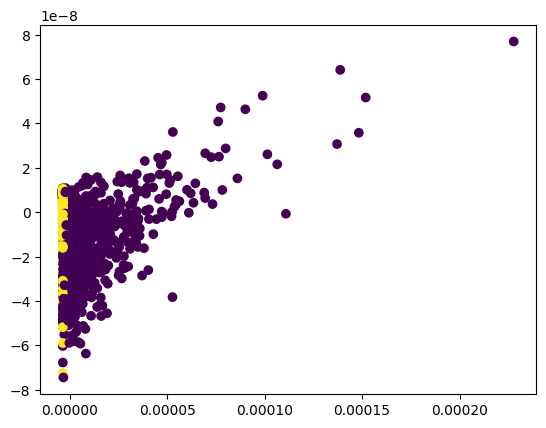

In [20]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label);

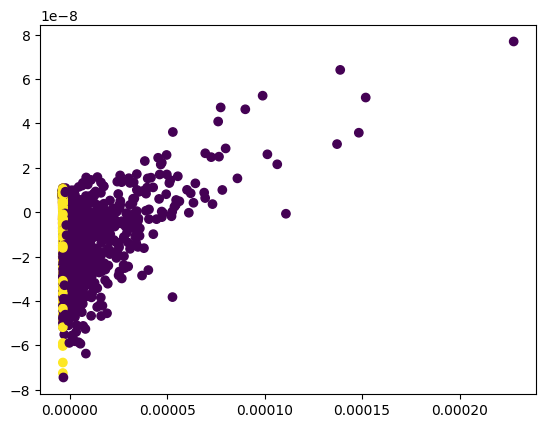

In [21]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred);

In [22]:
with open("models_checkpoints/knn_lang.bin", "wb") as f:
    pickle.dump(knn, f)

### Without lang

In [23]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [24]:
data.drop(columns=['lang'])

,name,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911861962,Madrid Lae Maika .,0,2019-11-29 13:16:02,1126,52.677158,12.767086,0.024281,0.775180,0.192446,0.0,0.0,0.053058,0.250664,0.297762,0.043478,58.838683
1378532629,Clau Sato,0,2018-04-27 03:01:58,3024,59.716210,12.984608,0.088504,0.524772,0.114959,0.0,0.0,0.199134,0.506598,0.773291,4.565176,34.533536
126984069,ALMA LETICIA NUÑO,0,2015-03-29 17:01:24,6,67.666667,15.833333,0.005109,0.333333,0.333333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2383025796,Minnie Guadagno,1,2019-03-13 02:44:13,42,63.278846,13.971154,0.000000,0.365385,0.009615,0.0,0.0,0.076923,0.266469,0.391244,0.067308,0.286371


In [25]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std']


In [26]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2351467735,1550743978,53,46.951807,9.884337,0.000000,0.387952,0.038554,0.0,0.0,0.043373,0.203696,0.257551,0.089157,1.095116
347587058,1470273787,53,78.573190,17.079357,0.005109,0.000000,0.000000,0.0,0.0,0.013137,0.127206,0.098533,0.013137,0.122918
1129895606,1517367911,53,55.833333,12.611111,0.000000,0.000000,0.111111,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
269193431,1458547948,9105,60.301689,12.949343,0.051782,0.505816,0.036398,0.0,0.0,0.160600,0.495103,0.661001,7.414634,40.107973
2368471386,1551683554,54,63.949580,15.117647,0.000000,0.352941,0.084034,0.0,0.0,0.050420,0.254332,0.281797,0.016807,0.128547


In [27]:
train_X = sklearn.preprocessing.normalize(train_set.values)
test_X = sklearn.preprocessing.normalize(test_set.values)

In [28]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_X)

In [29]:
k_range = list(range(8, 20))
param_grid = dict(
    n_neighbors = k_range,
    weights = list({'uniform', 'distance'}),
    algorithm = list({'auto', 'ball_tree', 'kd_tree', 'brute'})
)

knn = KNeighborsClassifier()

grid = GridSearchCV(
    knn,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_X, train_label)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3] END algorithm=kd_tree, n_neighbors=8, weights=distance;, score=0.896 total time=   0.0s
[CV 2/3] END algorithm=kd_tree, n_neighbors=8, weights=distance;, score=0.885 total time=   0.0s
[CV 3/3] END algorithm=kd_tree, n_neighbors=8, weights=distance;, score=0.879 total time=   0.0s
[CV 1/3] END algorithm=kd_tree, n_neighbors=8, weights=uniform;, score=0.885 total time=   0.1s
[CV 2/3] END algorithm=kd_tree, n_neighbors=8, weights=uniform;, score=0.879 total time=   0.1s
[CV 3/3] END algorithm=kd_tree, n_neighbors=8, weights=uniform;, score=0.876 total time=   0.1s
[CV 1/3] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.901 total time=   0.0s
[CV 2/3] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.884 total time=   0.0s
[CV 3/3] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.880 total time=   0.0s
[CV 1/3] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, sco

[CV 2/3] END algorithm=brute, n_neighbors=10, weights=distance;, score=0.879 total time=   0.0s
[CV 3/3] END algorithm=brute, n_neighbors=10, weights=distance;, score=0.868 total time=   0.0s
[CV 1/3] END algorithm=brute, n_neighbors=10, weights=uniform;, score=0.877 total time=   0.1s
[CV 2/3] END algorithm=brute, n_neighbors=10, weights=uniform;, score=0.880 total time=   0.1s
[CV 3/3] END algorithm=brute, n_neighbors=10, weights=uniform;, score=0.869 total time=   0.1s
[CV 1/3] END algorithm=brute, n_neighbors=11, weights=distance;, score=0.881 total time=   0.0s
[CV 2/3] END algorithm=brute, n_neighbors=11, weights=distance;, score=0.881 total time=   0.0s
[CV 3/3] END algorithm=brute, n_neighbors=11, weights=distance;, score=0.874 total time=   0.0s
[CV 1/3] END algorithm=brute, n_neighbors=11, weights=uniform;, score=0.881 total time=   0.1s
[CV 2/3] END algorithm=brute, n_neighbors=11, weights=uniform;, score=0.882 total time=   0.1s
[CV 3/3] END algorithm=brute, n_neighbors=11,

[CV 1/3] END algorithm=auto, n_neighbors=13, weights=distance;, score=0.898 total time=   0.0s
[CV 2/3] END algorithm=auto, n_neighbors=13, weights=distance;, score=0.886 total time=   0.0s
[CV 3/3] END algorithm=auto, n_neighbors=13, weights=distance;, score=0.882 total time=   0.0s
[CV 1/3] END algorithm=auto, n_neighbors=13, weights=uniform;, score=0.896 total time=   0.1s
[CV 2/3] END algorithm=auto, n_neighbors=13, weights=uniform;, score=0.886 total time=   0.1s
[CV 3/3] END algorithm=auto, n_neighbors=13, weights=uniform;, score=0.884 total time=   0.1s
[CV 1/3] END algorithm=auto, n_neighbors=14, weights=distance;, score=0.898 total time=   0.0s
[CV 2/3] END algorithm=auto, n_neighbors=14, weights=distance;, score=0.887 total time=   0.0s
[CV 3/3] END algorithm=auto, n_neighbors=14, weights=distance;, score=0.881 total time=   0.0s
[CV 1/3] END algorithm=auto, n_neighbors=14, weights=uniform;, score=0.896 total time=   0.1s
[CV 2/3] END algorithm=auto, n_neighbors=14, weights=u

[CV 2/3] END algorithm=ball_tree, n_neighbors=15, weights=distance;, score=0.887 total time=   0.1s
[CV 3/3] END algorithm=ball_tree, n_neighbors=15, weights=distance;, score=0.883 total time=   0.1s
[CV 1/3] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.898 total time=   0.1s
[CV 2/3] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.887 total time=   0.1s
[CV 3/3] END algorithm=ball_tree, n_neighbors=15, weights=uniform;, score=0.885 total time=   0.1s
[CV 1/3] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.900 total time=   0.1s
[CV 2/3] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.888 total time=   0.1s
[CV 3/3] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.886 total time=   0.1s
[CV 1/3] END algorithm=ball_tree, n_neighbors=16, weights=uniform;, score=0.898 total time=   0.1s
[CV 2/3] END algorithm=ball_tree, n_neighbors=16, weights=uniform;, score=0.885 total time=   0.1s
[CV 3

In [30]:
knn = grid.best_estimator_

In [31]:
train_pred = knn.predict(train_X)
test_pred = knn.predict(test_X)

In [32]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  1.0
Accuracy test set  0.8844483058210252
Precision train set  1.0
Recall train set  1.0
F1 score train set  1.0
Support train set  (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([3774, 4281]))


In [33]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.97      0.78      0.86      1618
         >50       0.83      0.98      0.90      1835

    accuracy                           0.88      3453
   macro avg       0.90      0.88      0.88      3453
weighted avg       0.90      0.88      0.88      3453



In [34]:
# cross validation
scores = cross_validate(knn, train_X, train_label, cv = 3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.004431406656901042
Score time  0.03282666206359863
Test score  0.8911235257603972
Train score  1.0


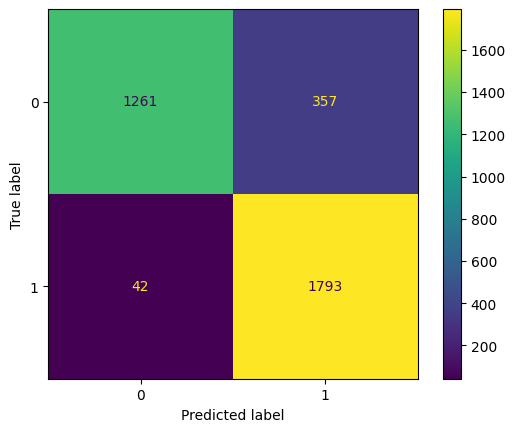

In [35]:
predictions = knn.predict(test_X)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

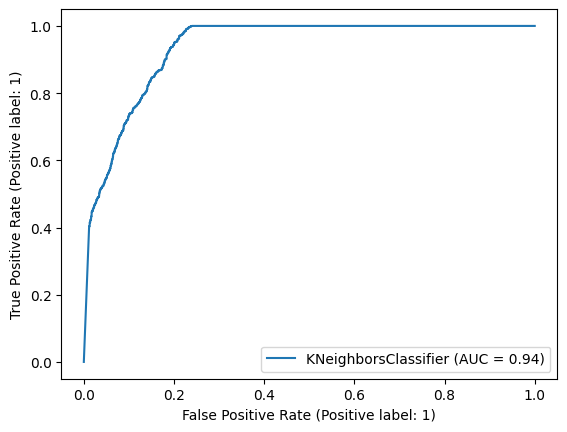

In [36]:
svc_disp = RocCurveDisplay.from_estimator(knn, test_X, test_label)
plt.show()

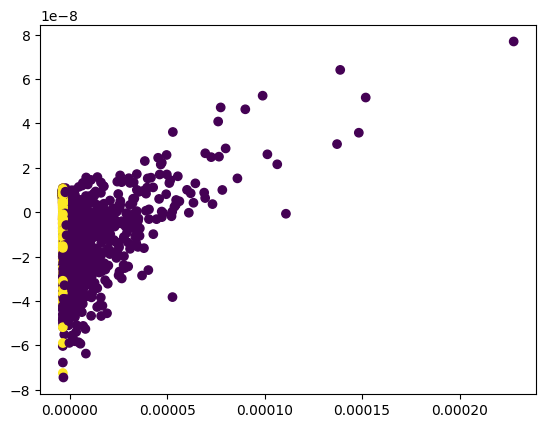

In [37]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label);

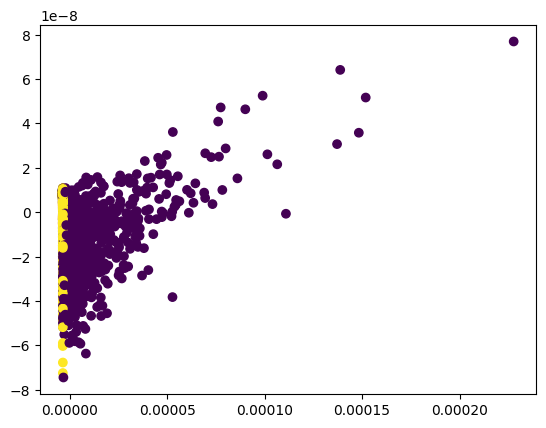

In [38]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred);

In [39]:
with open("models_checkpoints/knn_no_lang.bin", "wb") as f:
    pickle.dump(knn, f)